# Проект 5. Исследование продаваемости видеоигр

## Введение

В нашем распоряжении данные о продаваемости видеоигр интернет-магазина "Стримчик",который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation)

Цель исследования:  выявить определяющие успешность игры закономерности

**Задачи исследования:**
* Задача 1. 
 * 1.1 Сколько игр выпускалось в разные годы?
 * 1.2 Как менялись продажи по платформам? За какой характерный срок появляются новые и исчезают старые платформы?
 * 1.3 Какой период можно считать актуальным для проверки успешности платформ в 2017 году?
 * 1.4 Какие платформы являются потенциально прибыльными?
 * 1.5 Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
 * 1.6 Какие жанры можно считать самыми прибыльными?
* Задача 2.
 * 2.1 Необходимо описать разницу между между продажами среди популярных платформ 
 * 2.2 Необходимо описать разницу между между продажами среди популярных жанров
 * 2.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?
* Задача 3.
 * 3.1 Проверка гипотезы: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
 * 3.2 Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные
 
 **Ход исследования:**
 
* 1.Открыть файл (/datasets/games.csv) и изучить общую информацию
* 2.Провести предобработку данных
* 3.Исследовательский анализ данных : выполнение поставленных задач 
* 4.Составление портрета пользователя каждого региона
* 5.Проверка гипотезы
* 6.Общий вывод

<div class="alert alert-info">
Описание данных: 

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке
* EU_sales — продажи в Европе
* JP_sales — продажи в Японии
* Other_sales — продажи в других странах 
* User_Score — оценка пользователей (максимум 10)
* Critic_Score — оценка критиков (максимум 100)
* Rating — рейтинг от организации ESRB
</div>

## Открытие файла и изучение общей информации

In [14]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [16]:
try:
    df = pd.read_csv('/datasets/games.csv').copy()
except:
    df = pd.read_csv('C:/Users/jerno/PycharmProjects/sds2/Data/games.csv').copy()

In [17]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Предобработка данных 

### Замена названий столбцов 

In [18]:
df.columns=df.columns.str.lower()

### Обработка пропусков в столбцах

In [19]:
df['year_of_release']=df['year_of_release'].fillna(0)#Нули будут обозначать пропуски
df['critic_score']=df['critic_score'].fillna(-1)#В данном столбце пропусков 51%, 
#поэтому не можем заполнять каким-нибудь значением(медианным или средним), лучше заполнить как"-1"
df['user_score']=df['user_score'].fillna(-1)#Заполнили пропуски значением "-1", из-за большого количества пропусков не стоит 
#заполнять медианой, средним и т.д.
df['user_score']=df['user_score'].replace({'tbd': -1 })# tbd тоже посчитаем за пропуск и заполним как "-1"
df['rating']=df['rating'].fillna('noname')

<div class="alert alert-info">
Поясняющая логика в заполнении столбцов:

* year_of_release: нули будут обозначать пропуски
* critic_score: в данном столбце пропусков 51%, поэтому не можем заполнять каким-нибудь значением(медианным или средним), лучше заполнить как"-1"
* user_score: заполнили пропуски значением "-1", из-за большого количества пропусков не стоит заполнять медианой, средним и т.д.
* user_score: tbd тоже посчитаем за пропуск и заполним как "-1"
* rating : пропуски заполнили на "noname"
</div>

* столбец name : не можем заполнить, так как не знаем имён пропущенных игр
* столбец genre: не можем заполнить, так как не знаем жанра пропущенных игр
* cтолбец rating : 40 % пропущенных данных, заполнили "noname", данное значение пригодится нам для последующих задач
* столбец user_score: значение 'tbd' имеет долю 0.24 от всех значений, это значение означает "будет определено позже"

### Преобразование типов столбцов

In [20]:
df['year_of_release']=df['year_of_release'].astype('int')#Заменили так, потому что год не может быть с плавающей точкой
df['critic_score']=df['critic_score'].astype('int')#Посчитаем, что оценка критиков не может быть с плавающей точков
df['user_score']=df['user_score'].astype('float')#Сделаем промежуточную замену на float, так как изначально не получается
#заменить на int
df['user_score']=df['user_score'].astype('int')#Посчитаем, что оценка пользователей не может быть с плавающей точков

<div class="alert alert-info">
Поясняющая логика в преобразовании типов  столбцов:

* year_of_release: заменили на int, потому что год не может быть с плавающей точкой
* critic_score: заменили на int, оценка критиков не может быть с плавающей точков
* user_score: делаем промежуточную замену на float, так как изначально не получается заменить на int; оценка пользователей не может быть с плавающей точков
</div>

### Суммарные продажи во всех регионах

In [21]:
df['all_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales'] # млн. копий

## Исследовательский анализ данных 

### Количество игр в разные годы

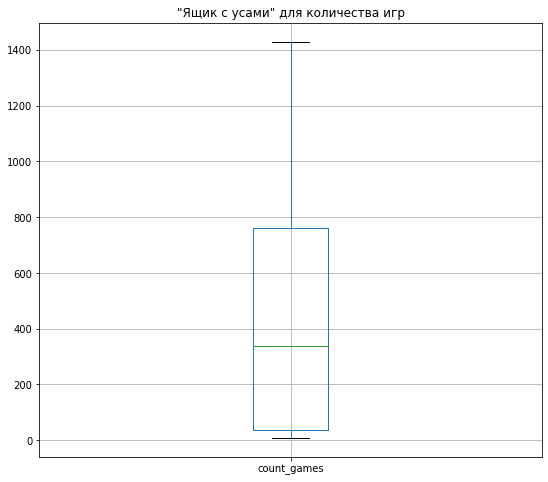

In [22]:
import matplotlib.pyplot as plt
pivot_name = df.query('year_of_release!=0').pivot_table(index='year_of_release', values='name', aggfunc=['count'])
pivot_name.columns = ['count_games']
column=['count_games']
pivot_name.boxplot(column, grid=True, figsize=(9,8))
plt.title('"Ящик с усами" для количества игр')
plt.show()

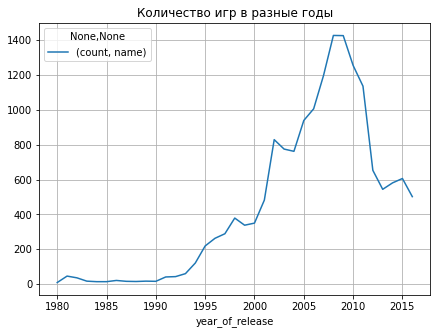

In [23]:
pivot_name2 = df.query('year_of_release!=0').pivot_table(index='year_of_release', values='name', aggfunc=['count'])
pivot_name2.plot(grid=True, figsize=(7,5))
plt.title('Количество игр в разные годы')
plt.show()

In [24]:
df['year_of_release'].value_counts().head().to_frame()

,year_of_release
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136


**Вывод:**
* количество выпущенный игр увеличивается с 1980 года(9 игр) по 2008 год (1427 игр) - 2009 год( 1426 игр), дальше происходит заметный спад в значениях до 2016 года ( 502 игры)
* не все данные важны, можем рассматривать данные с 1994 года, так как именно с этой даты начинаются заметные изменения в количествах( 50-100 значений с прибавлением года)

### Продажи по платформам

####  Выберем платформы с наибольшими продажами

In [25]:
df.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(6).to_frame() # Отобрали 6 платформ

,all_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86


#### Построение графиков 

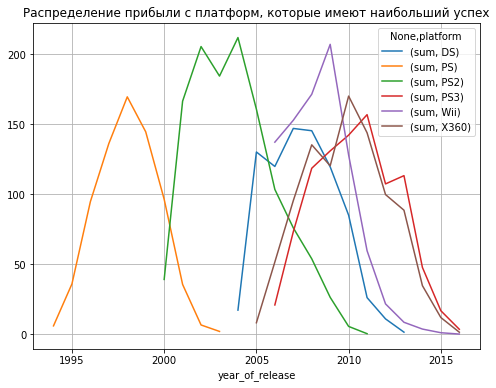

In [26]:
pivot_name3 = df.query('platform=="PS2" or platform=="X360" or platform=="PS3"''\
                       or platform=="Wii" or platform=="DS" or platform=="PS"')\
                .query('year_of_release!=0 and year_of_release>1992')\
                .pivot_table(index='year_of_release',columns='platform', values='all_sales', aggfunc=['sum'])
pivot_name3.plot(grid=True, figsize=(8,6))
plt.title('Распределение прибыли с платформ, которые имеют наибольший успех')
plt.show()

**Вывод:**

* Заметим, что каждое распределение напоминает нам нормальное распреление; на некоторых платформах есть даже по нескольков пиков
* Заметим, что за 10 лет  полностью исчезают платформы
* Через 2,5 года после пика суммарных продаж появляются новые платформы ( на графике тому пример PS и PS2, остальные представленные платформы начинают рост прибыли примерно с одного и того же года)

### Определение актуального периода

In [28]:
df_good=df.query('year_of_release>2013')

### Выборка потенциально прибыльных платформ

**Общий вид прибыли всех платформ**

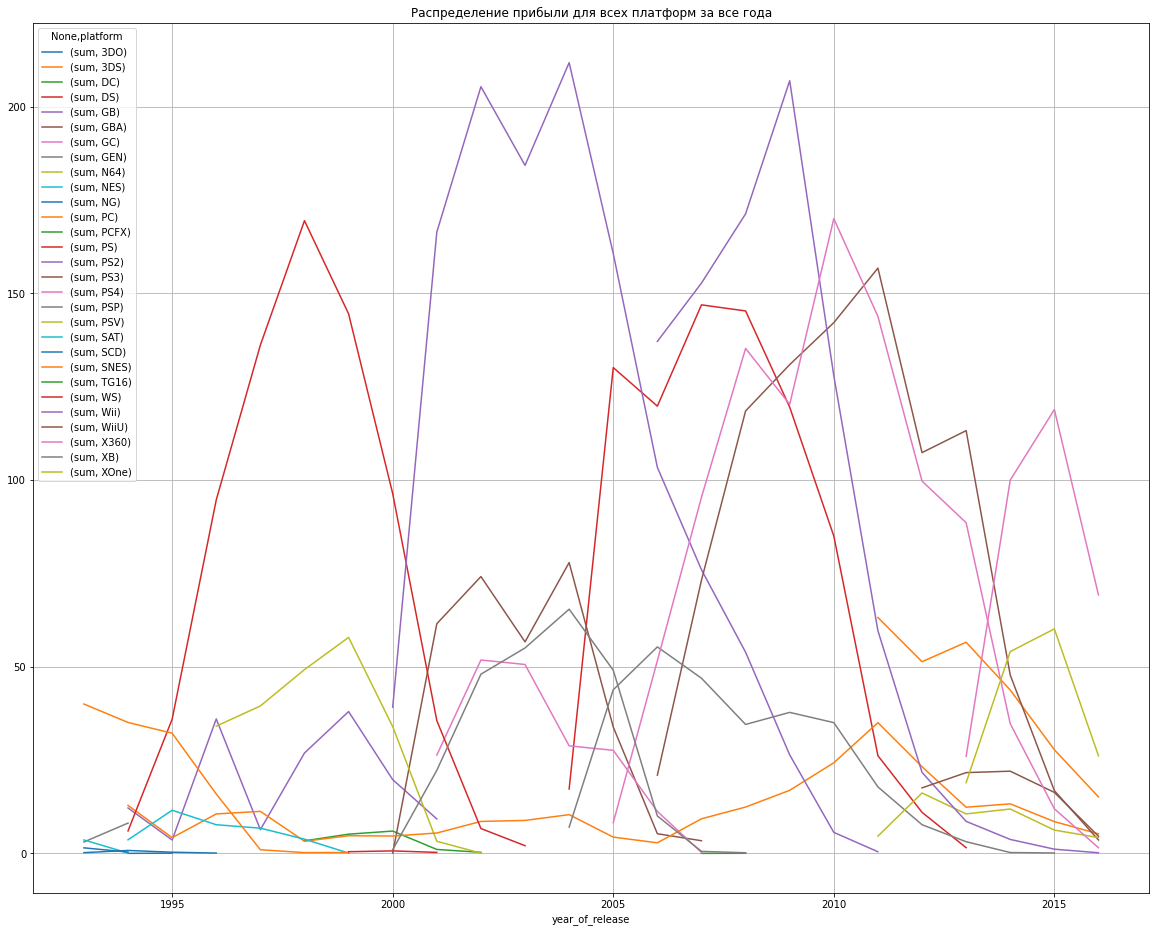

In [29]:
pivot_platf = df.query('year_of_release!=0 and year_of_release>1992')\
                .pivot_table(index='year_of_release',columns='platform', values='all_sales', aggfunc=['sum'])
pivot_platf.plot(grid=True, figsize=(20,16))
plt.title('Распределение прибыли для всех платформ за все года')
plt.show()

#### Выбор платформ, которые лидируют по продажам

In [30]:
df_good.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(6).to_frame() # Отобрали 6 платформ

,all_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98


<div class="alert alert-info">
После изменения актуального периода делаем вывод, что PS4 более прибыльная платформа, чем PS3
</div>

#### Выбор платформ, которые падают по продажам ( будем рассматривать даты, которые находятся ближе к 2016 году)

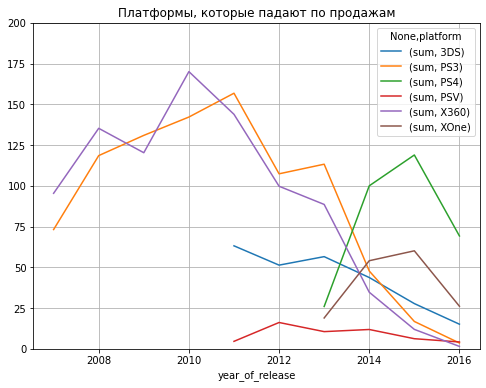

In [31]:
pivot_platf2 = df.query('platform=="XOne" or platform=="3DS" or platform=="PS4" \
                        or platform=="PS3" or  platform=="X360" or platform=="PSV"')\
             .query('year_of_release!=0 and year_of_release>2006')\
             .pivot_table(index='year_of_release',columns='platform', values='all_sales', aggfunc=['sum'])
ax1=pivot_platf2.plot(grid=True, figsize=(8,6))
ax1.set_ylim([0,200])
plt.title('Платформы, которые падают по продажам')
plt.show()

**Вывод:**
* Платформы, которые падают по продажам: PS3, PS4, PSV, 3DS, XOne, X360
* Обратим внимание, что некоторые из этих платформ выпустились относительно недавно, поэтому будем иметь в виду, что возможен в будущем их пик
* Также обратим внимание на то, что некоторые платформы (PS4 , XOne) довольно прибыльны в 2016 году

#### Выбор потенциально прибыльных платформ

**Будем рассматривать те платформы, которые имеют устоявшуюся линейку, а также те, цена на которые стабильна**

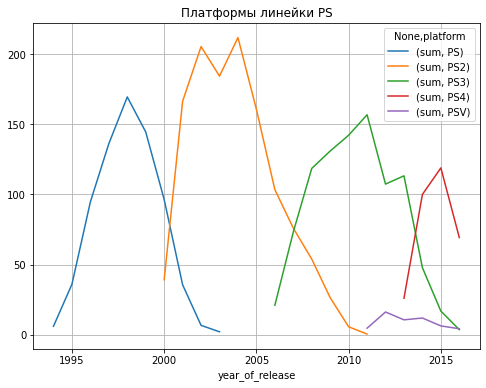

In [32]:
pivot_platf3 = df.query('platform=="PS2" or platform=="PS" or platform=="PS3" or platform=="PSV" or platform=="PS4"')\
                .query('year_of_release!=0 and year_of_release>1992')\
                .pivot_table(index='year_of_release',columns='platform', values='all_sales', aggfunc=['sum'])
pivot_platf3.plot(grid=True, figsize=(8,6))
plt.title('Платформы линейки PS')
plt.show()

**Промежуточный вывод:**
* Как видим, при выпуске следующей модели клиенты делают уже предзаказ, ориентируясь на качество первой модели
* Судя по PS, PS2, PS3, можно сказать, что PS4 ещё не достиг своего максимума, модель только что выпустилась
* PSV значительно отличается от остальных моделей, так как это портативная игровая приставка, которая подходит меньшему количеству людей

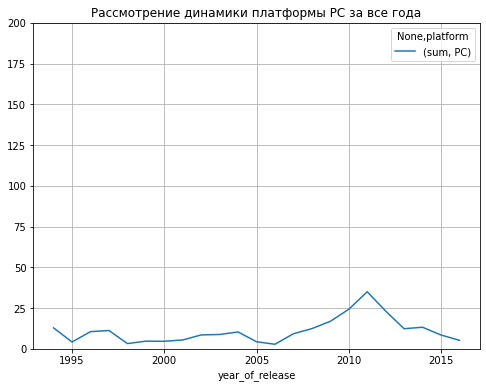

In [33]:
pivot_platf4 = df.query('year_of_release!=0 and year_of_release>1992')\
                .query('platform=="PC"')\
                .pivot_table(index='year_of_release',columns='platform', values='all_sales', aggfunc=['sum'])
ax=pivot_platf4.plot(grid=True, figsize=(8,6))
ax.set_ylim([0,200])
plt.title('Рассмотрение динамики платформы PС за все года')
plt.show()

**Промежуточный вывод:**
* Заметим, что прибыль с игр на персональный компьютер на всём промежутке времени держится стабильно, несмотря на то, что мы рассматриваем прибыль с 1992 года
* По сравнению с остальными платформами, имеет к 2016 году прибыль,которая меняется не резко( если рассмотреть касательную в точке ближе к 2016 г., то угол между суммой и датой будет меньше, чем у большинства платформ)

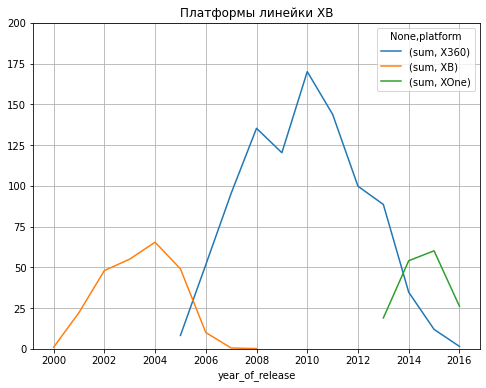

In [34]:
pivot_platf5 = df.query('year_of_release!=0 and year_of_release>1992')\
                .query('platform=="X360" or platform=="XOne" or platform=="XB"')\
                .pivot_table(index='year_of_release',columns='platform', values='all_sales', aggfunc=['sum'])
ax=pivot_platf5.plot(grid=True, figsize=(8,6))
ax.set_ylim([0,200])
plt.title('Платформы линейки XB')
plt.show()

**Промежуточный вывод:**
* По аналогии с PS рассматриваем данную линейку приставок 
* Как видим, XOne к 2016 году имеет не маленькую прибыль(по отношению к остальным платформам)
* Заметим также то, что XOne довольно-таки молодая модель, поэтому может иметь место на высокую прибыль в будущем 

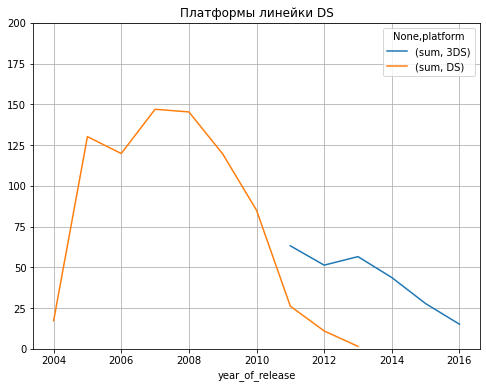

In [35]:
pivot_platf6 = df.query('year_of_release!=0 and year_of_release>1992')\
                .query('platform=="3DS" or platform=="DS" ')\
                .pivot_table(index='year_of_release',columns='platform', values='all_sales', aggfunc=['sum'])
ax=pivot_platf6.plot(grid=True, figsize=(8,6))
ax.set_ylim([0,200])
plt.title('Платформы линейки DS')
plt.show()

**Промежуточный вывод:**
* Как видим, при выпуске следующей модели клиенты делают уже предзаказ, ориентируясь на качество первой модели
* Как видим из графика, начальная сумма является пиковой, поэтому можем предположить, что ещё будет пик
* Можем также обнаружить, что прибыль уменьшается плавно, а не резко, поэтому к 2017 году можем иметь относительно неплохую прибыль;

**Потенциально прибыльные платформы:**
* 3DS
* XOne
* PC
* PS4

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам

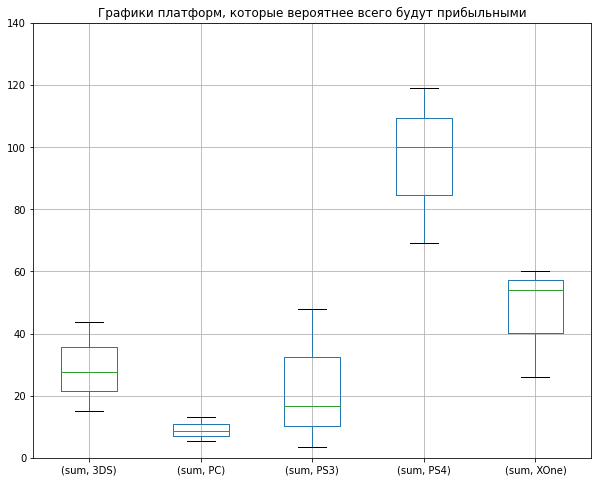

In [36]:
pivot_platf7 = df.query('year_of_release!=0 and year_of_release>2013')\
                .query('platform=="3DS" or platform=="XOne" or platform=="PC" or platform=="PS4" or platform=="PS3" ')\
                .pivot_table(index='year_of_release',columns='platform', values='all_sales', aggfunc=['sum'])
ax=pivot_platf7.boxplot(grid=True, figsize=(10,8))
ax.set_ylim([0,140])
plt.title('Графики платформ, которые вероятнее всего будут прибыльными')
plt.show()

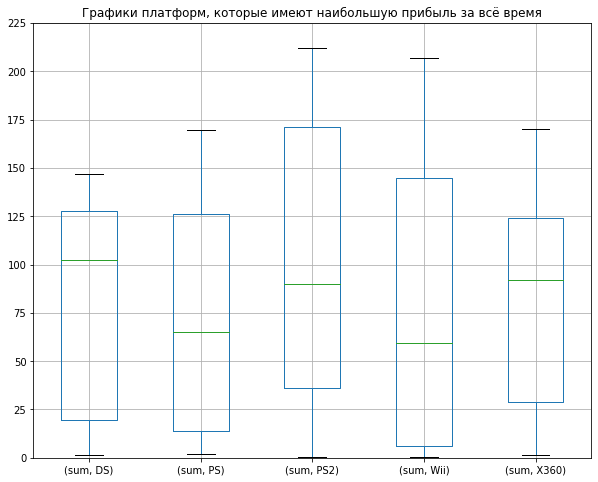

In [37]:
pivot_platf8 = df.query('year_of_release!=0 and year_of_release>1992')\
                .query('platform=="PS2" or platform=="X360" or platform=="Wii" or platform=="DS" or platform=="PS" ')\
                .pivot_table(index='year_of_release',columns='platform', values='all_sales', aggfunc=['sum'])
ax=pivot_platf8.boxplot(grid=True, figsize=(10,8))
ax.set_ylim([0,225])
plt.title('Графики платформ, которые имеют наибольшую прибыль за всё время')
plt.show()

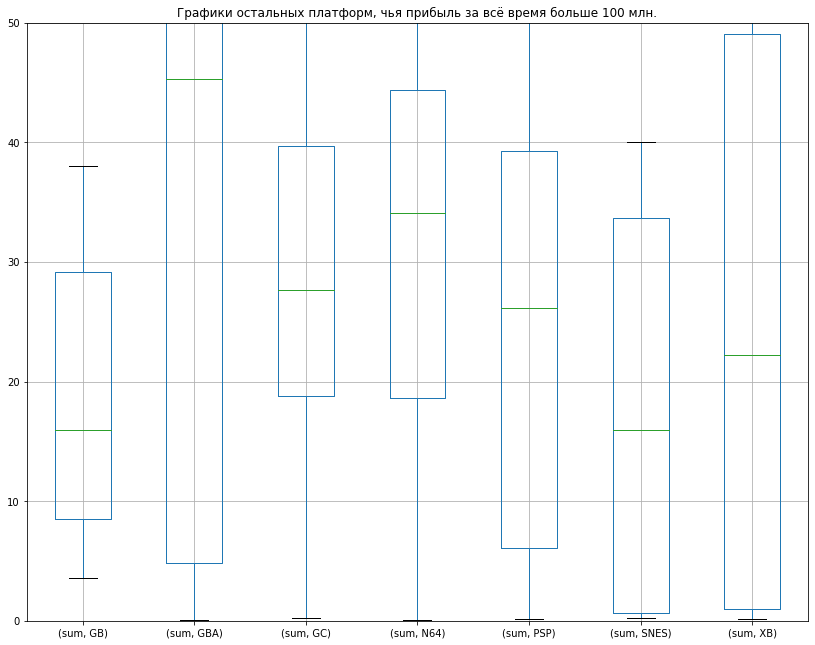

In [38]:
pivot_platf9 = df.query('year_of_release!=0 and year_of_release>1992')\
                 .query('platform=="GBA" or platform=="PSP" or platform=="XB" or platform=="GC" or platform=="2600" or \
                         platform=="GB" or platform=="N64" or platform=="SNES"')\
                .pivot_table( index='year_of_release',columns='platform', values='all_sales', aggfunc=['sum'])
ax=pivot_platf9.boxplot(grid=True, figsize=(14,11))
ax.set_ylim([0,50])
plt.title('Графики остальных платформ, чья прибыль за всё время больше 100 млн.')
plt.show()

**Вывод:**
* судя по медианным значениям для платформ, которые имеют наибольшую прибыль за всё время, мы делаем вывод, что, если медиана больше 50 млн., то выбранные нами платформы перспективны с точки зрения продаж интернет-магазина, то есть, где медиана дохода выше - это надёжнее для вложения денег
* мы выбрали число 50 млн., так как именно с него начинаются медианные значения для платформ, которые имеют наибольшую прибыль за всё время

### Влияние оценок критиков и пользователей на продажи платформы

#### Оценка критиков и пользователей для одной популярной платформы

**Выберем популярную платформу для актульного периода - PS4**

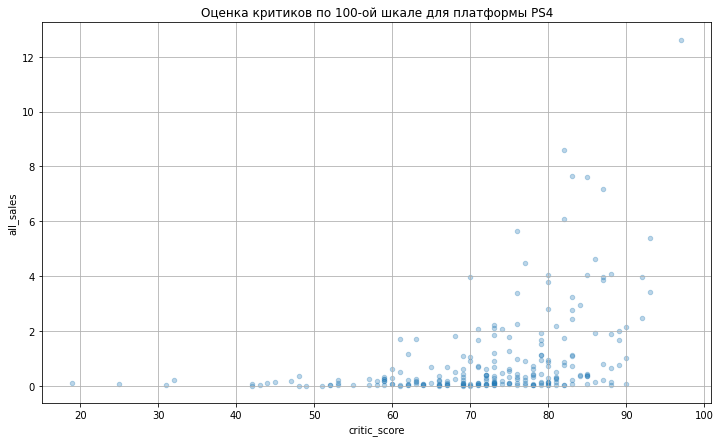

0.40656790206178095

In [39]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
df.query('critic_score!=-1 and year_of_release!=0 and year_of_release>2013 and platform=="PS4"')\
  .plot(x='critic_score',y='all_sales',kind='scatter',grid=True, figsize=(12,7),alpha=0.3) 
plt.title('Оценка критиков по 100-ой шкале для платформы PS4')
plt.show()
(df[(df['critic_score']!=-1)&(df['platform']=='PS4')]['critic_score']).corr(df['all_sales'])

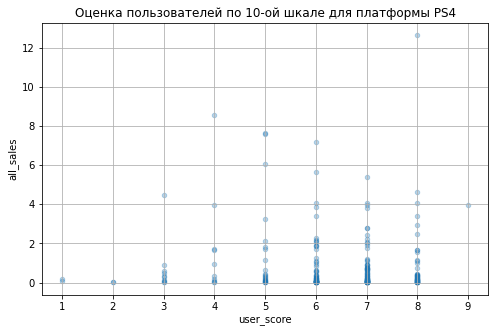

-0.027033058622341115

In [40]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
df.query('user_score!=-1 and year_of_release!=0 and year_of_release>2013 and platform=="PS4"')\
  .plot(x='user_score',y='all_sales',kind='scatter',grid=True, figsize=(8,5),alpha=0.3) 
plt.title('Оценка пользователей по 10-ой шкале для платформы PS4')
plt.show()
(df[(df['user_score']!=-1)&(df['platform']=='PS4')]['user_score']).corr(df['all_sales'])

**Промежуточный вывод:**
* Видим среднюю зависимость между оценкой критиков и общей прибылью у платформы PS4 : 0.40
* Видим cлабую зависимость между оценкой пользователей и общей прибылью у платформы PS4 : -0.027

<div class="alert alert-info">
Изменение промежуточного вывода; в том числе и изменение общего вывода
</div>

**Промежуточный вывод:**
* Видим слабо выраженную  зависимость между оценкой критиков и общей прибылью у платформы PS4,так как коэффициент корелляции равен 0.40
* Заметим, что зависимости между оценкой пользователей и общей прибылью вообще нет, так как коэффициент корелляции равен -0.027

#### Оценки критиков для остальных платформ

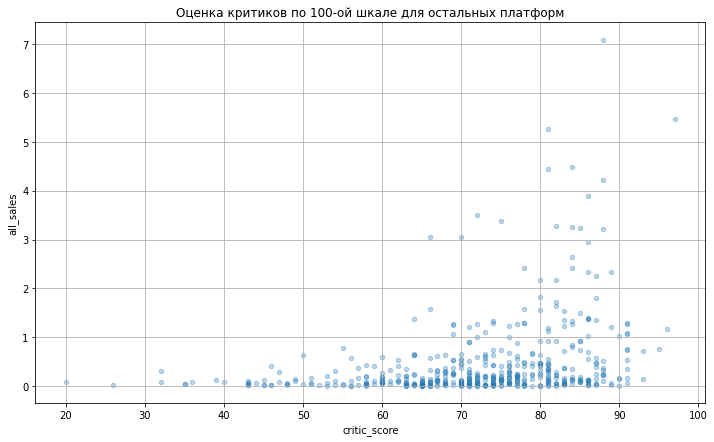

0.24550668717736354

In [41]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
df.query('critic_score!=-1 and year_of_release!=0 and year_of_release>2013  and platform!="PS4"')\
  .plot(x='critic_score',y='all_sales',kind='scatter',grid=True, figsize=(12,7),alpha=0.3) 
plt.title('Оценка критиков по 100-ой шкале для остальных платформ')
plt.show()
(df[df['critic_score']!=-1]['critic_score']).corr(df['all_sales'])

#### Оценка пользователей для остальных платформ

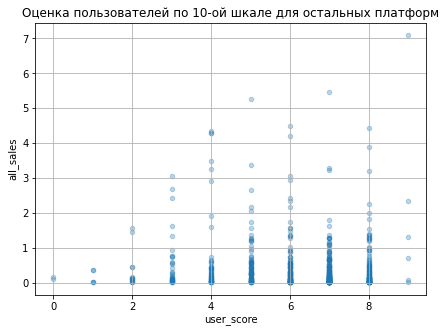

0.0862414825645815

In [42]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
df.query('year_of_release!=0 and year_of_release>2013 and user_score!=-1 and platform!="PS4"')\
  .plot(x='user_score',y='all_sales',kind='scatter',grid=True, figsize=(7,5),alpha=0.3) 
plt.title('Оценка пользователей по 10-ой шкале для остальных платформ')
plt.show()
(df[df['user_score']!=-1]['user_score']).corr(df['all_sales'])

**Промежуточный вывод:**
* Имеем слабую зависимость между оценками критиков и общей суммой для остальных платформ: 0.24
* Зависимость между оценкой пользователей и общей суммой для остальных платформ довольно слабая: 0.08

**Вывод:**

* Для самых прибыльных платформ: существует зависимость между оценкой критиков и продажами этой платформы; нет зависимости между оценкой пользователей и продажами
* Для остальных платформ: слабая зависимость между оценкой критиков и продажами; можно сказать, что вообще нет зависимости между оценкой пользователей и продажами

### Рассмотрение  распределения игр по жанрам

#### Распределение по количеству жанров

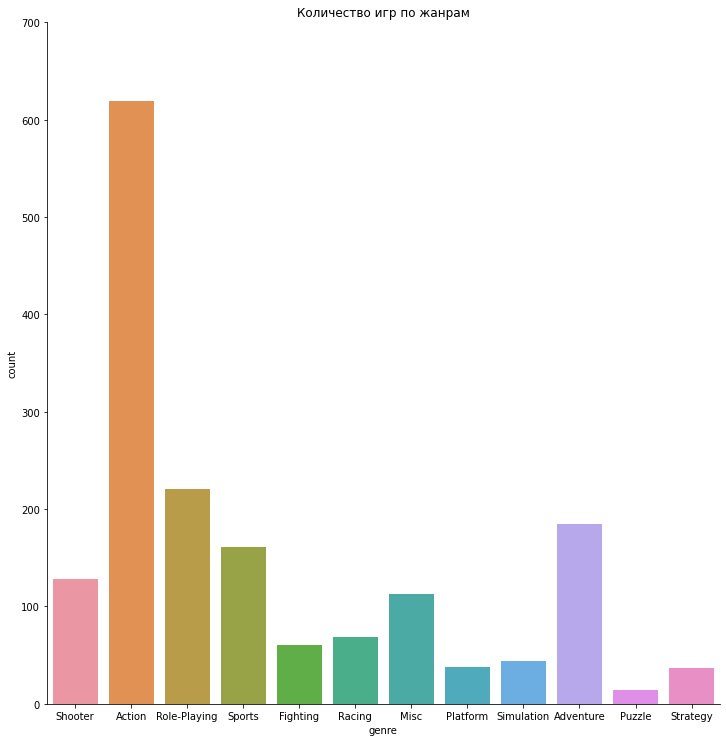

In [43]:
ax=sns.catplot(data=df_good, x='genre', kind='count', height=10)
ax.set(ylim=(0, 700))
plt.title('Количество игр по жанрам')
plt.show()

#### Распределение по прибыльности жанров

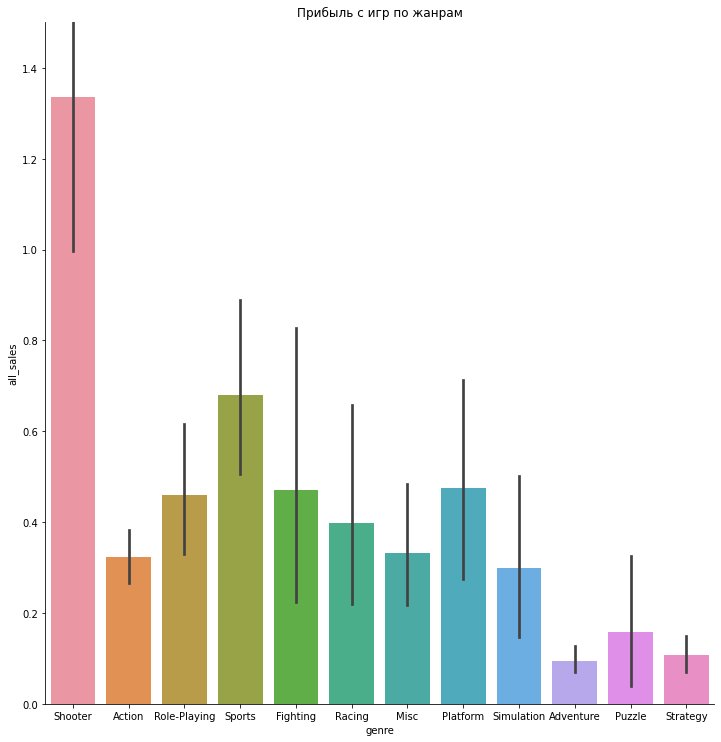

In [44]:
ax1=sns.catplot(data=df_good, x='genre', y='all_sales', kind='bar',height=10)
plt.title('Прибыль с игр по жанрам')
ax1.set(ylim=(0, 1.5))
plt.show()

**Вывод:**
* самые прибыльные жанры:  Shooter, Sports, Role-Playing, Fighting, Platform
* самые неприбыльные жанры:  Adventure, Pazzle, Strategy; видим, как эта тройка выделяется от остальных жанров
* несмотря на то, что продано относительно огромное количество игр жанра Action прибыль с них находится на одном уровне с конкурентами; аналогично, жанр Adventure имеет наименьшую прибыль, но по количеству находится на лидирующем месте
    

## Составление  портрета  пользователя каждого региона

### Самые популярные платформы(топ 5)

#### Рассмотрение прибыли с Северной Америки

**Рассмотрение платформ**

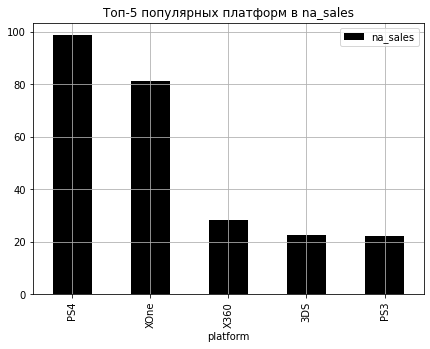

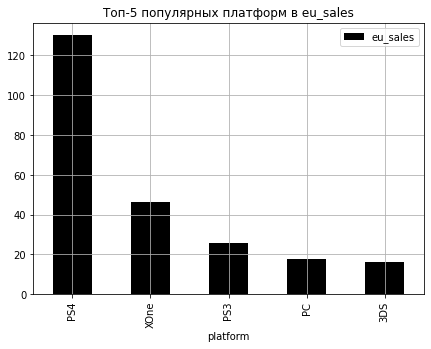

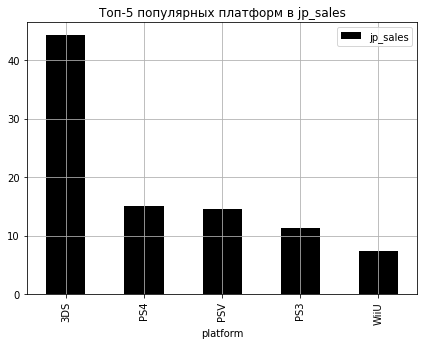

In [45]:
countries=['na_sales','eu_sales','jp_sales']
for country in countries:
    df_good.groupby(by='platform').agg({country :'sum'}).sort_values(by=country, ascending=False).head()\
           .plot(kind='bar',cmap='gray',grid='True', figsize=(7,5))
    plt.title(f'Топ-5 популярных платформ в {country}')
    plt.show()

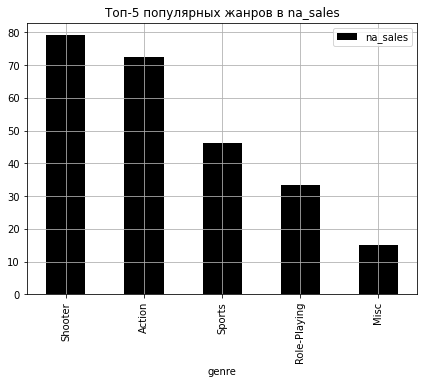

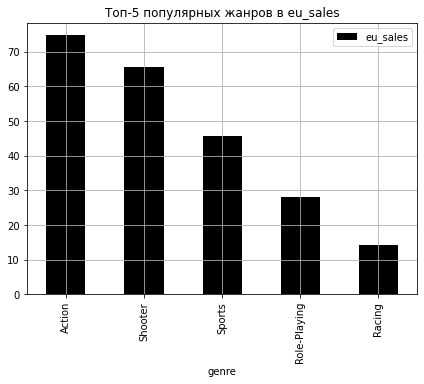

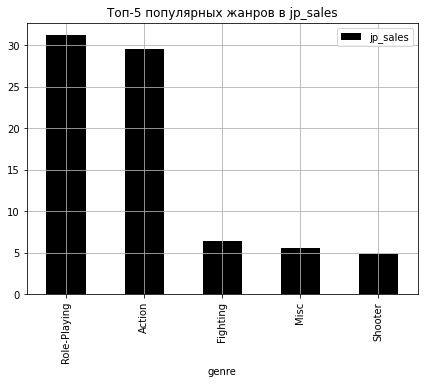

In [46]:
countries=['na_sales','eu_sales','jp_sales']
for country in countries:
    df_good.groupby(by='genre').agg({country :'sum'}).sort_values(by=country, ascending=False).head()\
           .plot(kind='bar',cmap='gray',grid='True', figsize=(7,5))
    plt.title(f'Топ-5 популярных жанров в {country}')
    plt.show()

In [47]:
df_good.groupby('platform')['na_sales'].agg('sum').sort_values(ascending=False).to_frame().head()

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


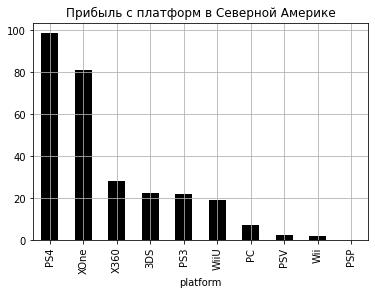

In [48]:
df_good.groupby('platform')['na_sales']\
  .agg('sum').sort_values(ascending=False).plot(kind='bar',cmap='gray',grid='True')
plt.title('Прибыль с платформ в Северной Америке')
plt.show()

**Рассмотрение жанров**

In [49]:
df_good.groupby('genre')['na_sales'].agg('sum').sort_values(ascending=False).head().to_frame()

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


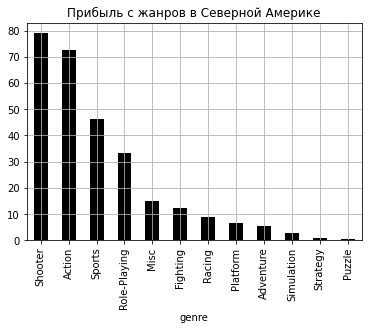

In [50]:
df_good.groupby('genre')['na_sales']\
  .agg('sum').sort_values(ascending=False).plot(kind='bar',cmap='gray',grid='True')
plt.title('Прибыль с жанров в Северной Америке')
plt.show()

**Вывод:**
* наиболее прибыльными платформами являются: PS4, XOne, X360; это связано что с тем, что люди уже знакомы с предыдущими моделями: PS3,PS2,PS,XB, поэтому у них сформировалось мнение о данных платформах
* наиболее прибыльными жанрами являются: Shooter,Action,Sports; это связано с тем, что большинство людей любит динамичным игры, нежели те, в которых нужны усидчивость, мыслительный процесс: Simulation, Strategy, Puzzle

#### Рассмотрение прибыли с Европейского союза

**Рассмотрение платформ**

In [51]:
df_good.groupby('platform')['eu_sales'].agg('sum').sort_values(ascending=False).head().to_frame()

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


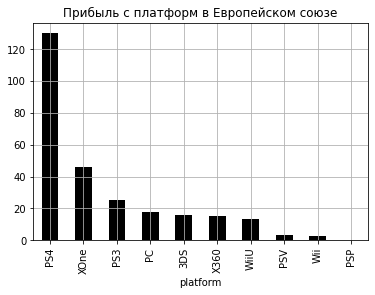

In [52]:
df_good.groupby('platform')['eu_sales']\
  .agg('sum').sort_values(ascending=False).plot(kind='bar',cmap='gray',grid='True')
plt.title('Прибыль с платформ в Европейском союзе')
plt.show()

**Рассмотрение жанров**

In [53]:
df_good.groupby('genre')['eu_sales'].agg('sum').sort_values(ascending=False).head().to_frame()

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


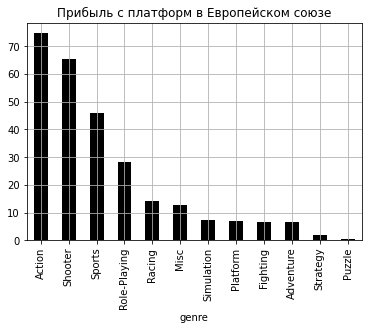

In [54]:
df_good.groupby('genre')['eu_sales']\
  .agg('sum').sort_values(ascending=False).plot(kind='bar',cmap='gray',grid='True')
plt.title('Прибыль с платформ в Европейском союзе')
plt.show()

**Вывод:**
* наиболее прибыльными платформами являются: PS4, XOne, PS3; заметим, что PS4 заметно опережает по прибыли XOne - примерно в 3 раза
* наиболее прибыльными жанрами являются: Action, Shooter,Sports; аналогично Северной Америке

#### Рассмотрение прибыли с Японии

**Рассмотрение платформ**

In [55]:
df_good.groupby('platform')['jp_sales'].agg('sum').sort_values(ascending=False).head().to_frame()

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


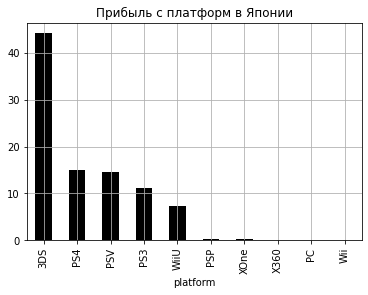

In [56]:
df_good.groupby('platform')['jp_sales']\
  .agg('sum').sort_values(ascending=False).plot(kind='bar',cmap='gray',grid='True')
plt.title('Прибыль с платформ в Японии')
plt.show()

**Рассмотрение жанров**

In [57]:
df_good.groupby('genre')['jp_sales'].agg('sum').sort_values(ascending=False).head().to_frame()

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


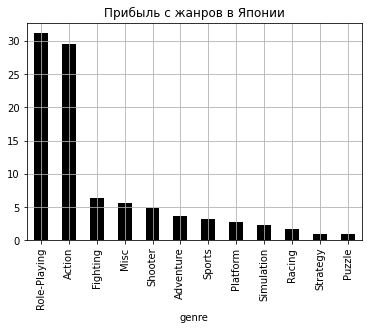

In [58]:
df_good.groupby('genre')['jp_sales']\
  .agg('sum').sort_values(ascending=False).plot(kind='bar',cmap='gray',grid='True')
plt.title('Прибыль с жанров в Японии')
plt.show()

**Вывод:**
* наиболее прибыльными платформами являются: 3DS, PS4, PSV; заметим, что прибыль с платформы 3DS заметно больше, чем у PS4 - примерно в 3 раза
* наиболее прибыльными жанрами являются:  Role-Playing, Action, Fighting; значит в Японии люди любят  динамические игры(Action, Role-Playing); менее популярны жанры, нацеленные на мыслительный процесс(Strategy, Puzzle), также непопулярны гонки(Racing)
* судя по графикам прибыли платформ, можно сделать вывод, что людям из Европы и Северной Америки больше нравятся платформы линеек PS4, XOne, X360, но из этой категории выбивается приставка PSV(PlayStation Vita) - видно, что она не в тренде у данной категории
* что же касается Японии, то здесь наоборот PSV занимает 3 место по прибыли; также Японцы являются любителями портативных приставок, поэтому у них на первом месте по прибыли располагается Nintendo DS3

### Рассмотрение влияние рейтинга ESRB на продажи в отдельном регионе

#### Рассмотрение влияния рейтинга на прибыль в Северной Америки

In [59]:
df_good.groupby(['rating','platform'])['na_sales'].agg('sum').sort_values(ascending=False).to_frame().head()

na_sales
rating platform          
M      XOne         38.42
       PS4          37.72
noname PS4          23.31
T      PS4          16.38
noname XOne         14.41

#### Рассмотрение влияния рейтинга на прибыль в Европейском союзе

In [60]:
df_good.groupby(['rating','platform'])['eu_sales'].agg('sum').sort_values(ascending=False).to_frame().head()

,,eu_sales
rating,platform,
M,PS4,52.81
noname,PS4,27.69
E,PS4,25.14
M,XOne,21.06
T,PS4,18.31


#### Рассмотрение влияния рейтинга на прибыль в Японии

In [61]:
df_good.groupby(['rating','platform'])['jp_sales'].agg('sum').sort_values(ascending=False).to_frame().head()

jp_sales
rating platform          
noname 3DS          33.24
       PSV           9.36
       PS4           6.25
       PS3           6.10
M      PS4           4.87

**Вывод:**
*  как мы видим, так как рейтинг E(Everyone), то пользоваться игрой для этой платформы может каждый,соответственно, чем больше людей, тем больше продаж - это нам и подтверждает столбец na_sales
* так же можем рассмотреть рейтинги M(Mature),то есть люди с 17+ лет, а также T(Teenagers), то есть подростки(13+ лет); как мы знаем в подростковом возрасте являются любителями видеоигр, соответственно, они будут одними из тех, кто значительно приносят прибыль той или иной платформе
* из предыдущих пунктов мы делаем вывод, что рейтинг влияет на продажи 

**Промежуточный вывод:**
* продажи в Северной Америке:
  * как видим, самая большая прибыль идёт с игр  с рейтингом M(Mature),то есть люди с 17+ лет;дальше идёт неизвестный рейтинг noname, после идёт рейтинг T(Teenagers), то есть подростки(13+ лет)
* продажи в Европейском союзе:
   * видим аналогию с Северной Америкой;  самая большая прибыль идёт с игр  с рейтингом M, потом неизвестный рейтинг noname, дальше E(Everyone), то есть игры для всех возростов
* продажи в Японии:
    * заметим, как Япония отличилась по рейтингам;  самая большая прибыль идёт с игр  с неизвестным рейтингом noname, дальше рейтинг M

**Вывод:**
*  да, рейтинг влияет рейтинг на продажи в каждом регионе
   *  если человек думает о покупке какой-нибудь видеоигры, то он, наверняка, обращает внимание на рейтинг, так как у него ъ возникают подобные мысли : " А может она для детей, поэтому мне будет неинтересно в неё играть? А может игра с подобным рейтингом не будет подходить для моего ребёнка, я же не знаю сюжет игры?"
   *  как мы знаем в подростковом возрасте являются любителями видеоигр, соответственно, они будут одними из тех, кто значительно приносят прибыль той или иной платформе; поэтому большинство покупают игры с рейтингом T или M

## Проверка гипотез

* Будем использовать специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var)
* Уровень статистической значимости (alpha) выберем 0.05


### Проверка первой гипотезы 

**Сформулируем нулевую и альтурнативную гипотезы :**
* Нулевая гипотеза Hₒ:средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Альтернативная гипотеза H₁: средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [62]:
user_xone=df[(df['platform']=='XOne')&(df['user_score']!=-1) & (df['year_of_release']>=2016)]['user_score']
user_pc=df[(df['platform']=='PC')&(df['user_score']!=-1)& (df['year_of_release']>=2016)]['user_score']

alpha = 0.05

results = st.ttest_ind(user_xone, user_pc, equal_var=False)
print('p-значение:',results.pvalue) 

if (results.pvalue<alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.29138695136487813
Не получилось отвергнуть нулевую гипотезу


In [64]:
user_xone

571      5
640      3
709      8
758      6
1439     6
        ..
16508    8
16544    6
16630    8
16643    6
16660    6
Name: user_score, Length: 66, dtype: int64

### Проверка второй  гипотезы 

**Сформулируем нулевую и альтурнативную гипотезы :**
* Нулевая гипотеза Hₒ:cредние пользовательские рейтинги жанров Action и Sports одинаковы
* Альтернативная гипотеза H₁: cредние пользовательские рейтинги жанров Action и Sports не одинаковы

In [63]:
from scipy import stats as st
import numpy as np

user_action=df[(df['genre']=='Action')&(df['user_score']!=-1) & (df['year_of_release']>=2016)]['user_score']
user_sports=df[(df['genre']=='Sports')&(df['user_score']!=-1) & (df['year_of_release']>=2016)]['user_score']

alpha = 0.05

results = st.ttest_ind(user_action, user_sports, equal_var=False)

print('p-значение:',results.pvalue) 

if (results.pvalue<alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.002584278950669636
Отвергаем нулевую гипотезу


**Вывод:**
* не отвергаем нулевую гипотезу, следовательно, средние пользовательские рейтинги платформ Xbox One и PC одинаковые
*  отвергаем нулевую гипотезу, следовательно, cредние пользовательские рейтинги жанров Action и Sports разные

## Общий вывод

**было проведено исследование, которое позволило выявить определяющие успешность игр в 2017 году закономерности**

Перед проведением исследования были выдвинуты следующие задачи:
* Задача 1. 
 * 1.1 Сколько игр выпускалось в разные годы?
 * 1.2 Как менялись продажи по платформам? За какой характерный срок появляются новые и исчезают старые платформы?
 * 1.3 Какой период можно считать актуальным для проверки успешности платформ в 2017 году?
 * 1.4 Какие платформы являются потенциально прибыльными?
 * 1.5 Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
 * 1.6 Какие жанры можно считать самыми прибыльными?
* Задача 2.
 * 2.1 Необходимо описать разницу между между продажами среди популярных платформ 
 * 2.2 Необходимо описать разницу между между продажами среди популярных жанров
 * 2.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?
* Задача 3.
 * 3.1 Проверка гипотезы: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
 * 3.2 Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные

Имеем следующие результаты:
* Задача 1.
 * 1.1  количество выпущенный игр увеличивается с 1980 года(9 игр) по 2008 год (1427 игр) - 2009 год( 1426 игр), дальше происходит заметный спад в значениях до 2016 года ( 502 игры)
 * 1.2 
   * каждое распределение напоминает нам нормальное распреление; на некоторых платформах есть даже по нескольков пиков(PS2, DS, PS3)
   *  за 10 лет  полностью исчезают платформы; через 2,5 года после пика суммарных продаж появляются новые платформы
 * 1.3 делаем вывод, что актуальный период начинается с 2013 года и заканчивается 2016 годом
 * 1.4 3DS, XOne, PC, PS4
 * 1.5 рассматриваемая платформа - PS4
   * Видим слабо выраженную  зависимость между оценкой критиков и общей прибылью у платформы PS4,так как коэффициент корелляции равен 0.40
   * Заметим, что зависимости между оценкой пользователей и общей прибылью у платформы PS4 вообще нет, так как коэффициент корелляции равен -0.027
 * 1.6  Shooter, Sports, Role-Playing, Fighting, Platform
* Задача 2.
 * 2.1 наиболее прибыльными платформами являются: X360, 3DS, PS4; это связано что с тем, что люди уже знакомы с предыдущими моделями: PS2,PS,XOne, поэтому у них сформировалось мнение о данных платформах
 * 2.2 наиболее прибыльными жанрами являются: Action, Shooter,Sports; это связано с тем, что большинство людей любит динамичным игры, нежели те, в которых нужны усидчивость, мыслительный процесс: Strategy, Puzzle, Adventure
 * 2.3   да, рейтинг влияет рейтинг на продажи в каждом регионе
      *  если человек думает о покупке какой-нибудь видеоигры, то он, наверняка, обращает внимание на рейтинг, так как у него  возникают подобные мысли : " А может она для детей, поэтому мне будет неинтересно в неё играть? А может игра с подобным рейтингом не будет подходить для моего ребёнка, я же не знаю сюжет игры?"
      *  как мы знаем в подростковом возрасте являются любителями видеоигр, соответственно, они будут одними из тех, кто значительно приносят прибыль той или иной платформе; поэтому большинство покупают игры с рейтингом T(Teenagers) или M(Mature)
* Задача 3.
 * 3.1 гипотеза верна, средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 * 3.2 гипотеза верна, cредние пользовательские рейтинги жанров Action и Sports разные
 